## Tree Based Models in Python

Given a labeled dataset, a classification tree learn a sequence of if-else question about the individual features in order to in-order to infer to labels.

Tree Do Not require normalization (standardization)

### Reading Data 

In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

In [146]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

In [147]:
auto = pd.read_csv('https://assets.datacamp.com/production/repositories/1796/datasets/3781d588cf7b04b1e376c7e9dda489b3e6c7465b/auto.csv')
bikes = pd.read_csv('https://assets.datacamp.com/production/repositories/1796/datasets/594538f54a854b322d6e4c8031f3f31bc522d3e5/bikes.csv')
wisconsin_breast_cancer = pd.read_csv('https://assets.datacamp.com/production/repositories/1796/datasets/0eb6987cb9633e4d6aa6cfd11e00993d2387caa4/wbc.csv')

In [148]:
wisconsin_breast_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Decision tree for classification
<p id ='Dtfc'><p>

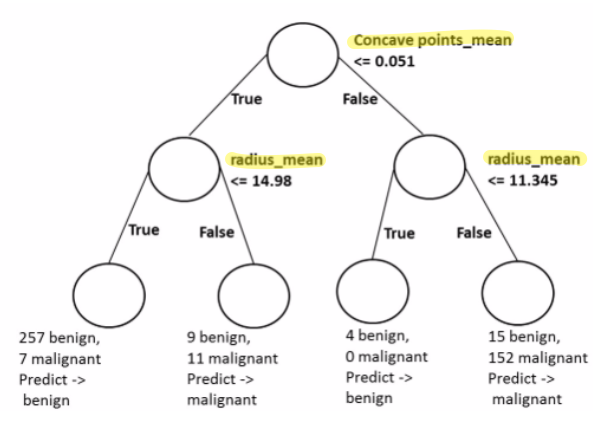

### Train your first classification tree
<p id ='Tyfct'><p>


In [149]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
X = wisconsin_breast_cancer[['radius_mean', 'concave points_mean']]
X.head()

,radius_mean,concave points_mean
0,17.99,0.14710
1,20.57,0.07017
2,19.69,0.12790
3,11.42,0.10520
4,20.29,0.10430


In [150]:
y = wisconsin_breast_cancer.diagnosis.map({'M':1, 'B':0})
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state =0)

In [152]:

dt = DecisionTreeClassifier(max_depth=6, random_state= 0)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

In [153]:
print(y_pred[0:5])
print(y_test[0:5])

[1 0 0 0 0]
512    1
457    0
439    0
298    0
37     0
Name: diagnosis, dtype: int64


### Evaluate the classification tree
<p id ='Etct'><p>


In [154]:
from sklearn.metrics import accuracy_score

In [155]:
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.87


In [156]:
export_graphviz?

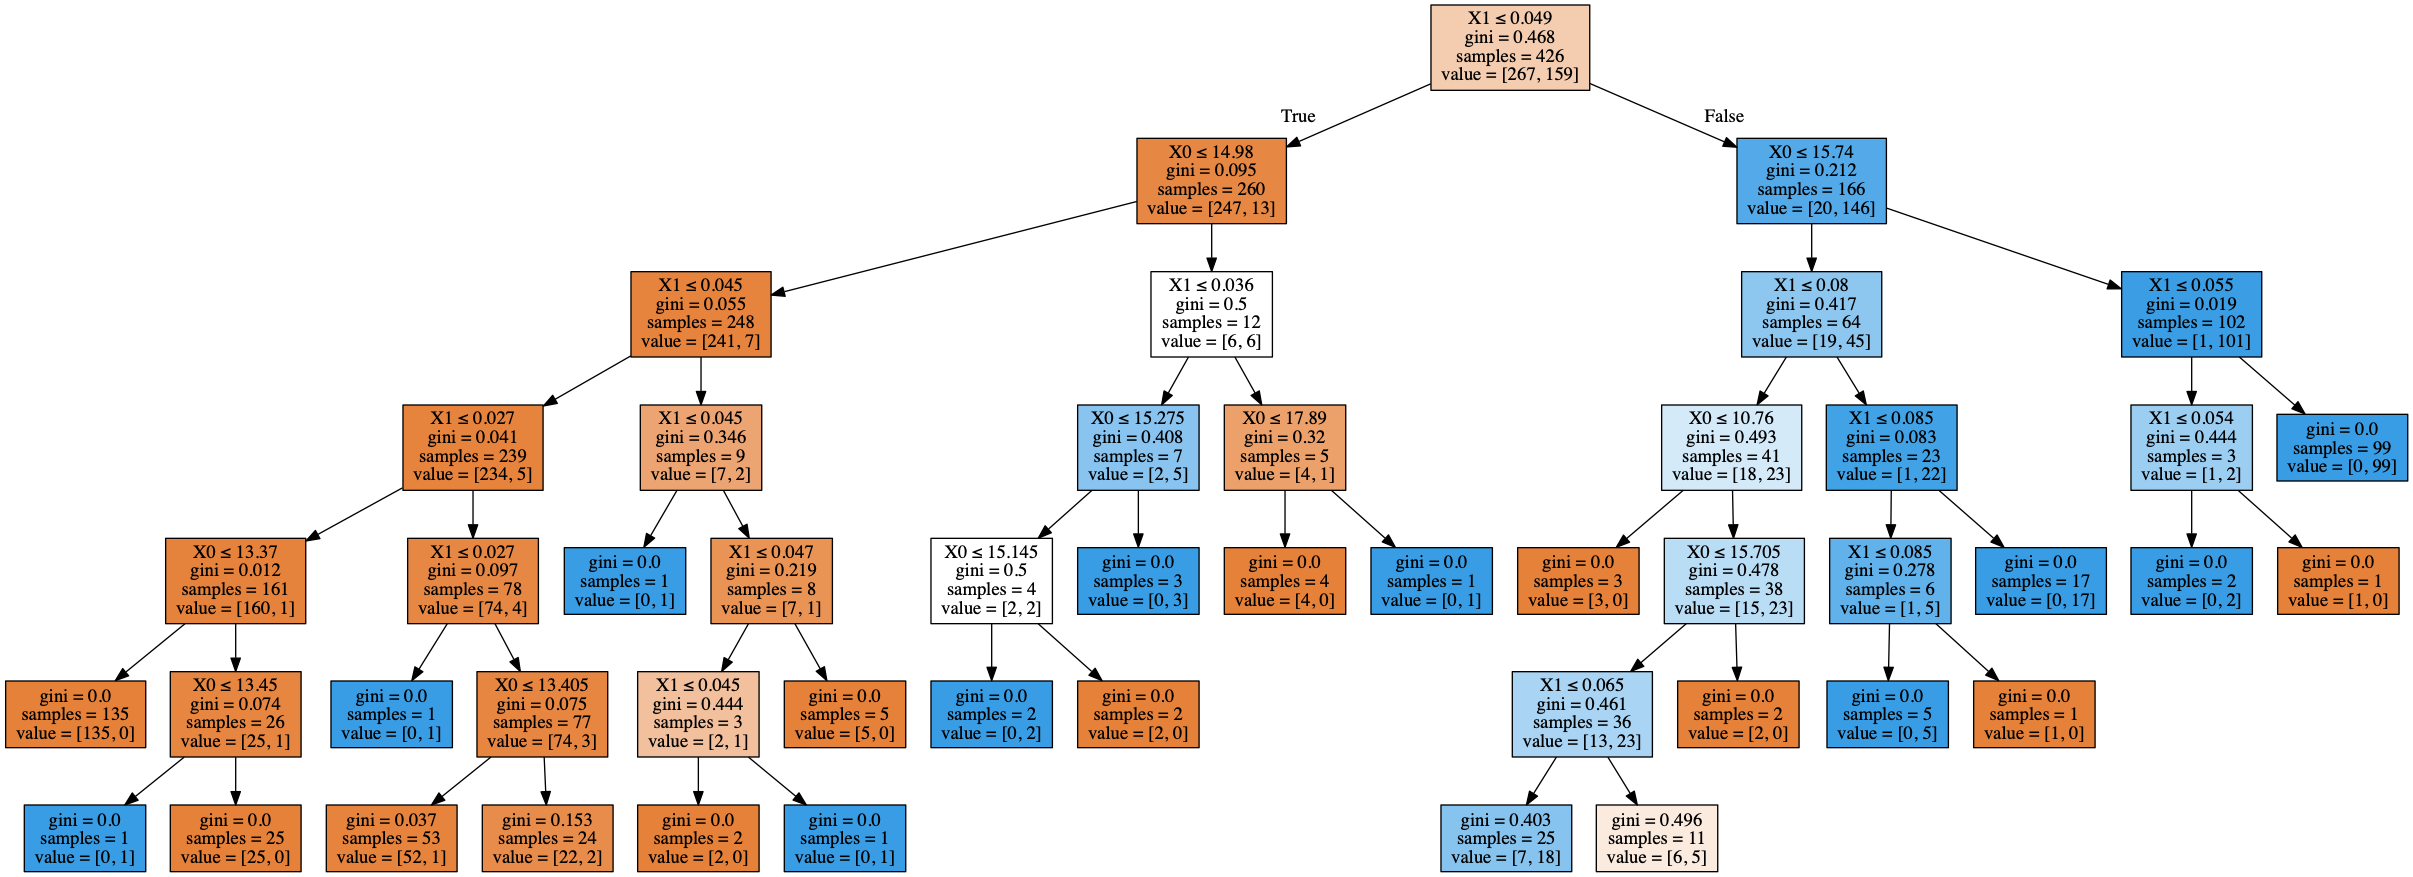

In [158]:
dot_data =export_graphviz(dt, out_file= None, filled= True, special_characters= True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [160]:
graph.write_jpg('cancer_decision_tree.jpg')

True

Not bad! Using only two features, your tree was able to achieve an accuracy of 87%!



### Logistic regression vs classification tree
<p id ='Lrvct'><p>


A classification tree divides the feature space into **rectangular regions**.In contrast, linear model such as logistic regression produces single decision boundary dividing feature space into two regions.

### Classification tree Learning
<p id ='CtL'><p>
    
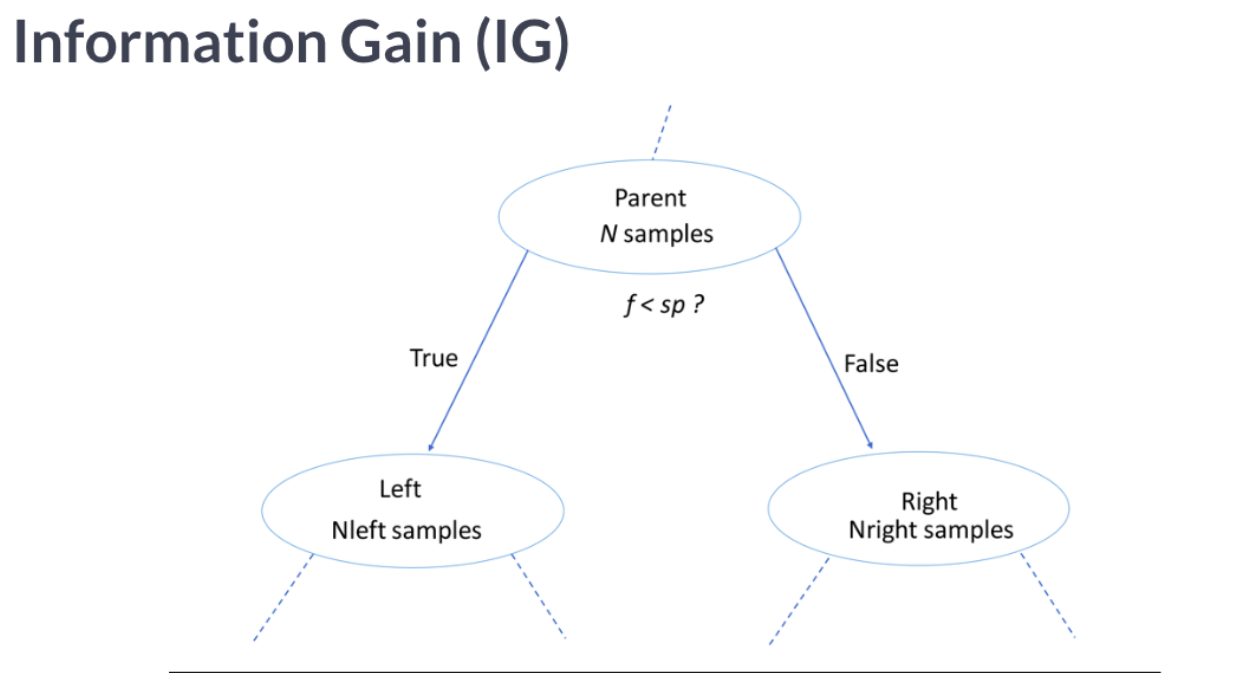


The nodes of classification tree are grown recursively, In other words, obtention of a internal node or a leaf node depends on the state of its predecessors.To produce the purest leaf possible, at each node, a tree asks a question involving one feature f and split-point sp.Decision tree knows which feature and which split point to pick by maximizing information gain.The tree considers that every node contains information and aims at maximizing information gain obtained after each split.

**Unconstrained Tree Rules**: At a non-leaf node the data is split based on:
* feature f and split point sp,in such a way to maximize information gain.   
* If information gain obtained by splitting a node is NULL, a node is declared to leaf node.



If we constrain the maximum depth to tree to two, all nodes having depth of 2 will be declared as leaf even if information gain obtained by splitting the node is not NULL.

### Growing a classification tree
<p id ='Gact'><p>


### Using entropy as a criterion
<p id ='Ueaac'><p>


In [142]:
from sklearn.tree import DecisionTreeClassifier
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)
dt_entropy.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

### Entropy vs Gini index
<p id ='EvGi'><p>


In [19]:
from sklearn.metrics import accuracy_score
y_pred = dt_entropy.predict(X_test)
accuracy_entropy = accuracy_score( y_test, y_pred)
# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)

Accuracy achieved by using entropy:  0.8951048951048951


In [20]:
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)
dt_gini.fit(X_train, y_train)
dt_gini.predict(X_test)
accuracy_gini = accuracy_score( y_test, y_pred)

print('Accuracy achieved by using the gini index: ', accuracy_gini)

Accuracy achieved by using the gini index:  0.8951048951048951


### Decision tree for regression
<p id ='Dtfr'><p>
    
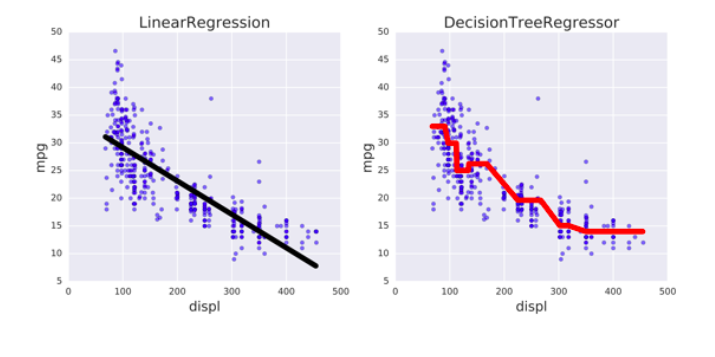

### When a regression tree is trained on dataset, the impurity of node is measured using mean-square error of the targets in that node.
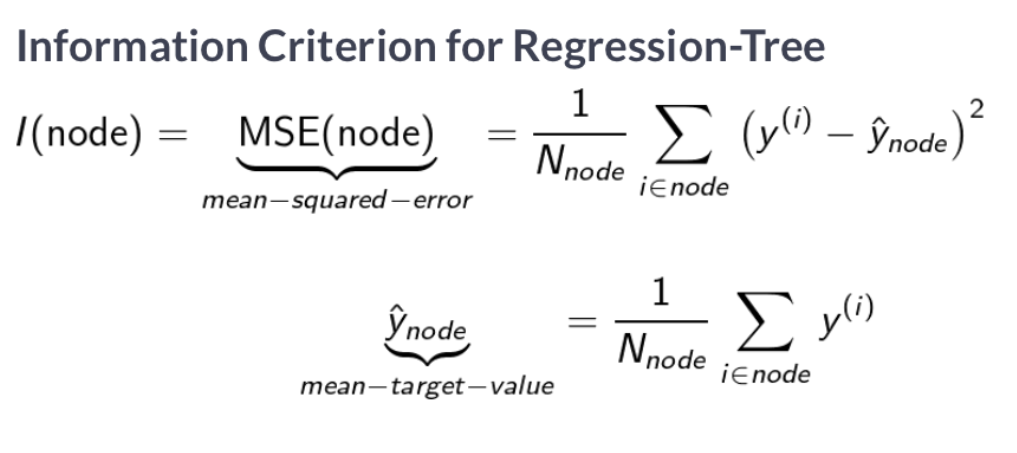

### Train your first regression tree
<p id ='Tyfrt'><p>


In [21]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth = 8, min_samples_leaf= 0.13, random_state=3) 
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=0.13,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=3, splitter='best')

### Evaluate the regression tree
<p id ='Etrt'><p>


In [22]:
from sklearn.metrics import mean_squared_error as MSE
y_pred = dtr.predict(X_test)
# Compute mse_dt
mse_dt = MSE(y_test, y_pred)

# Compute rmse_dt
rmse_dt = mse_dt**(1/2)

# Print rmse_dt
print("Test set RMSE of dt: {:.2f}".format(rmse_dt))

Test set RMSE of dt: 0.28


### Linear regression vs regression tree
<p id ='Lrvrt'><p>


In [30]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
mse_lr = MSE(y_test, y_pred_lr)
rmse_lr = mse_lr**(1/2)

# Print rmse_lr
print('Linear Regression test set RMSE: {:.2f}'.format(rmse_lr))

# Print rmse_dt
print('Regression Tree test set RMSE: {:.2f}'.format(rmse_dt))

Linear Regression test set RMSE: 0.58
Regression Tree test set RMSE: 0.28


In [42]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier


iris = load_iris()


In [44]:
iris.feature_names[2:]

['petal length (cm)', 'petal width (cm)']

Let's grab Petal Length and Petal Width from iris dataset as training features

In [32]:
X = iris.data[:, 2:]
y = iris.target

Let's do train-test split for model evaluation

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [85]:
tree_clf = DecisionTreeClassifier( random_state=0)
tree_clf_pruned = DecisionTreeClassifier(max_depth=2, random_state=0)

tree_clf.fit(X_train, y_train)
tree_clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

### Let's evaluate the model to see how model is performing on unseen training examples.


In [90]:
from sklearn.metrics import accuracy_score
y_pred = tree_clf.predict(X_test)
accuracy_score(y_pred , y_test)


0.9473684210526315

In [107]:
y_test[9]==tree_clf.predict(X_test[9].reshape(-1, 2))

array([ True])

### Let's visualize how Decision Tree Learning Works

In [80]:

dot_data =export_graphviz(tree_clf, out_file= None, filled= True, special_characters= True)
graph = pydotplus.graph_from_dot_data(dot_data)
dot_data_pruned =export_graphviz(tree_clf_pruned, out_file= None, filled= True, special_characters= True)
graph_pruned = pydotplus.graph_from_dot_data(dot_data_pruned)


In [81]:
graph.write_png("iris.png")


True

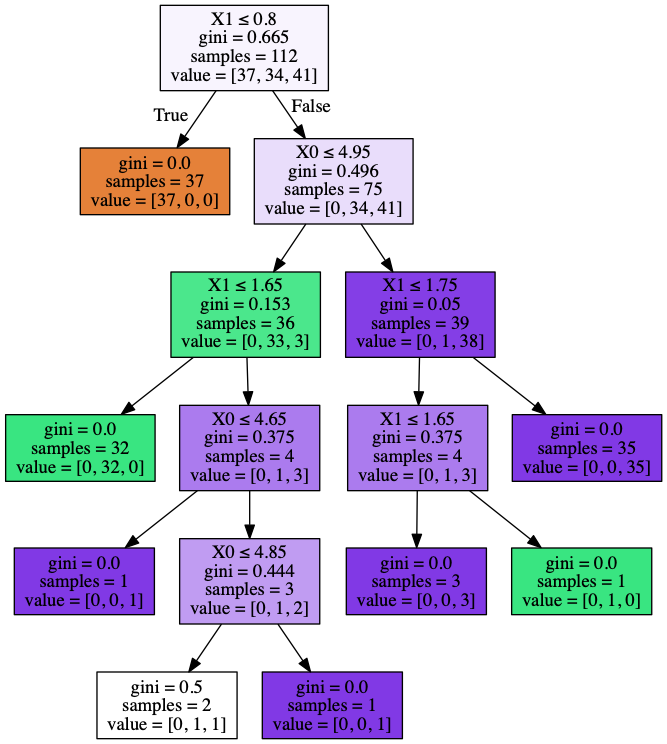

In [82]:
Image(graph.create_png())

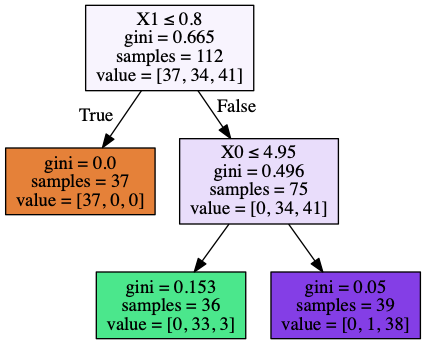

In [140]:
Image(graph_pruned.create_png())

### Now let's plot the decision boundary

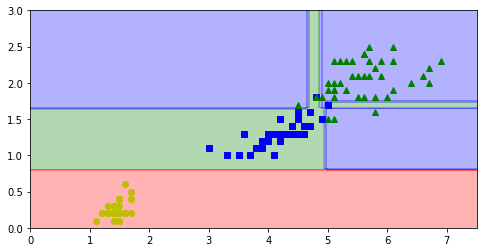

In [141]:
x1s = np.linspace(0, 7.5, 100)
x2s = np.linspace(0, 3, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = tree_clf.predict(X_new).reshape(x1.shape)
custom_cmap = ListedColormap(['red','green','blue'])
plt.figure(figsize=(8, 4))

plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)

plt.plot(X_train[:, 0][y_train==0], X_train[:, 1][y_train==0], "yo", label = 'Iris-Setosa')
plt.plot(X_train[:, 0][y_train==1], X_train[:, 1][y_train==1], "bs", label = 'Iris-Versicolor')
plt.plot(X_train[:, 0][y_train==2], X_train[:, 1][y_train==2], "g^", label = 'Iris-Versicolor')



### Now let's apply decision tree learning on random moons

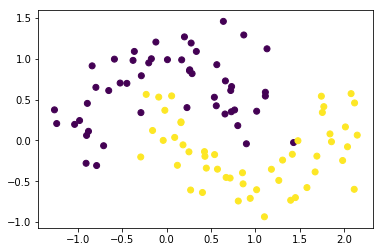

In [171]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=0)

plt.scatter(Xm[:, 0], Xm[:, 1], c= ym)

In [192]:
dt_clf1 = DecisionTreeClassifier(random_state=0)
dt_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
dt_clf1.fit(Xm, ym)
dt_clf2.fit(Xm, ym)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [185]:
ym

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0])

-1.2640486226325254

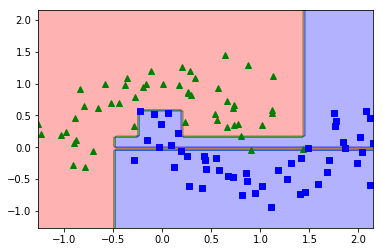

In [203]:
x1_s= np.linspace(np.min(Xm), np.max(Xm), 100)
x2_s= np.linspace(np.min(Xm), np.max(Xm), 100)
x1, x2 = np.meshgrid(x1_s, x2_s)
X_new = np.c_[x1.ravel(), x2.ravel()]
y_pred = dt_clf1.predict(X_new).reshape(x1.shape)
custom_cmap = ListedColormap(['red','green','blue'])
plt.contourf(x1, x2, y_pred, alpha =0.3, cmap= custom_cmap )
plt.plot(Xm[:, 0][ym==0], Xm[:, 1][ym==0], "g^")
plt.plot(Xm[:, 0][ym==1], Xm[:, 1][ym==1], "bs")

## Regression Trees

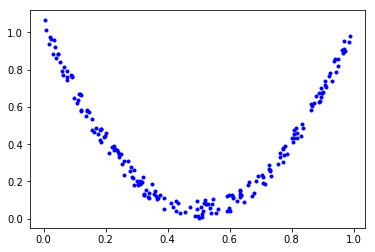

In [213]:
np.random.seed(42)
X = np.random.rand(200, 1)
y = 4*(X-0.5)**2
y = y+np.random.rand(200, 1)/10
plt.plot(X, y, 'b.')

In [215]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 0)

### Lets fit decision tree regressor on above mentioned dataset.

In [216]:
from sklearn.tree import DecisionTreeRegressor
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg1.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

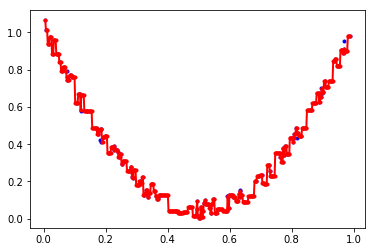

In [217]:
x1  = np.linspace(np.min(X_train), np.max(X_train), 500).reshape(-1,1)
y_pred = tree_reg1.predict(x1)
plt.plot(X_train, y_train, 'b.')
plt.plot(x1, y_pred, "r.-", linewidth= 2)


Above shown is example of overfitting in decision trees regressor.Lets above evaluate the model

Now let's eliminate the overfitting

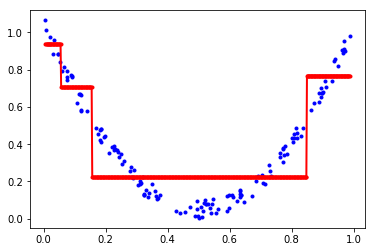

In [221]:
tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X_train, y_train)
x1  = np.linspace(np.min(X_train), np.max(X_train), 500).reshape(-1,1)
y_pred = tree_reg1.predict(x1)
plt.plot(X_train, y_train, 'b.')
plt.plot(x1, y_pred, "r.-", linewidth= 2)



### Bagging
<p id ='B'><p>


### Define the bagging classifier
<p id ='Dtbc'><p>


### Evaluate Bagging performance
<p id ='EBp'><p>


### Out of Bag Evaluation
<p id ='OoBE'><p>


### Prepare the ground
<p id ='Ptg'><p>


### OOB Score vs Test Set Score
<p id ='OSvTSS'><p>


### Random Forests (RF)
<p id ='RF('><p>


### Train an RF regressor
<p id ='TaRr'><p>


### Evaluate the RF regressor
<p id ='EtRr'><p>


### Visualizing features importances
<p id ='Vfi'><p>


### Tuning a CARTs Hyperprameters
<p id ='TaCH'><p>


### Tree hyperparameters
<p id ='Th'><p>


### Set the trees hyperparameter grid
<p id ='Stthg'><p>


### Search for the optimal tree
<p id ='Sftot'><p>


### Evaluate the optimal tree
<p id ='Etot'><p>


### Tuning a RFs Hyperparameters
<p id ='TaRH'><p>


### Random forests hyperparameters
<p id ='Rfh'><p>


### Set the hyperparameter grid of RF
<p id ='SthgoR'><p>


### Search for the optimal forest
<p id ='Sftof'><p>


### Evaluate the optimal forest
<p id ='Etof'><p>


### Congratulations!
<p id ='C'><p>


### Generalization Error
<p id ='GE'><p>


### Complexity, bias and variance
<p id ='Cbav'><p>


### Overfitting and underfitting
<p id ='Oau'><p>


### Diagnose bias and variance problems
<p id ='Dbavp'><p>


### Instantiate the model
<p id ='Itm'><p>


### Evaluate the 10-fold CV error
<p id ='Et1Ce'><p>


### Evaluate the training error
<p id ='Ette'><p>


### High bias or high variance?
<p id ='Hbohv'><p>


### Ensemble Learning
<p id ='EL'><p>


### Define the ensemble
<p id ='Dte'><p>


### Evaluate individual classifiers
<p id ='Eic'><p>


### Better performance with a Voting Classifier
<p id ='BpwaVC'><p>


### Adaboost
<p id ='A'><p>


### Define the AdaBoost classifier
<p id ='DtAc'><p>


### Train the AdaBoost classifier
<p id ='TtAc'><p>


### Evaluate the AdaBoost classifier
<p id ='EtAc'><p>


### Gradient Boosting (GB)
<p id ='GB('><p>


### Define the GB regressor
<p id ='DtGr'><p>


### Train the GB regressor
<p id ='TtGr'><p>


### Evaluate the GB regressor
<p id ='EtGr'><p>


### Stochastic Gradient Boosting (SGB)
<p id ='SGB('><p>


### Regression with SGB
<p id ='RwS'><p>


### Train the SGB regressor
<p id ='TtSr'><p>


### Evaluate the SGB regressor
<p id ='EtSr'><p>


### Decision tree for classification
<p id ='Dtfc'><p>


### Train your first classification tree
<p id ='Tyfct'><p>


### Evaluate the classification tree
<p id ='Etct'><p>


### Logistic regression vs classification tree
<p id ='Lrvct'><p>


### Classification tree Learning
<p id ='CtL'><p>


### Growing a classification tree
<p id ='Gact'><p>


### Using entropy as a criterion
<p id ='Ueaac'><p>


### Entropy vs Gini index
<p id ='EvGi'><p>


### Decision tree for regression
<p id ='Dtfr'><p>


### Train your first regression tree
<p id ='Tyfrt'><p>


### Evaluate the regression tree
<p id ='Etrt'><p>


### Linear regression vs regression tree
<p id ='Lrvrt'><p>


### Generalization Error
<p id ='GE'><p>


### Complexity, bias and variance
<p id ='Cbav'><p>


### Overfitting and underfitting
<p id ='Oau'><p>


### Diagnose bias and variance problems
<p id ='Dbavp'><p>


### Instantiate the model
<p id ='Itm'><p>


### Evaluate the 10-fold CV error
<p id ='Et1Ce'><p>


### Evaluate the training error
<p id ='Ette'><p>


### High bias or high variance?
<p id ='Hbohv'><p>


### Ensemble Learning
<p id ='EL'><p>


### Define the ensemble
<p id ='Dte'><p>


### Evaluate individual classifiers
<p id ='Eic'><p>


### Better performance with a Voting Classifier
<p id ='BpwaVC'><p>


### Bagging
<p id ='B'><p>


### Define the bagging classifier
<p id ='Dtbc'><p>


### Evaluate Bagging performance
<p id ='EBp'><p>


### Out of Bag Evaluation
<p id ='OoBE'><p>


### Prepare the ground
<p id ='Ptg'><p>


### OOB Score vs Test Set Score
<p id ='OSvTSS'><p>


### Random Forests (RF)
<p id ='RF('><p>


### Train an RF regressor
<p id ='TaRr'><p>


### Evaluate the RF regressor
<p id ='EtRr'><p>


### Visualizing features importances
<p id ='Vfi'><p>


### Adaboost
<p id ='A'><p>


### Define the AdaBoost classifier
<p id ='DtAc'><p>


### Train the AdaBoost classifier
<p id ='TtAc'><p>


### Evaluate the AdaBoost classifier
<p id ='EtAc'><p>


### Gradient Boosting (GB)
<p id ='GB('><p>


### Define the GB regressor
<p id ='DtGr'><p>


### Train the GB regressor
<p id ='TtGr'><p>


### Evaluate the GB regressor
<p id ='EtGr'><p>


### Stochastic Gradient Boosting (SGB)
<p id ='SGB('><p>


### Regression with SGB
<p id ='RwS'><p>


### Train the SGB regressor
<p id ='TtSr'><p>


### Evaluate the SGB regressor
<p id ='EtSr'><p>


### Tuning a CARTs Hyperprameters
<p id ='TaCH'><p>


### Tree hyperparameters
<p id ='Th'><p>


### Set the trees hyperparameter grid
<p id ='Stthg'><p>


### Search for the optimal tree
<p id ='Sftot'><p>


### Evaluate the optimal tree
<p id ='Etot'><p>


### Tuning a RFs Hyperparameters
<p id ='TaRH'><p>


### Random forests hyperparameters
<p id ='Rfh'><p>


### Set the hyperparameter grid of RF
<p id ='SthgoR'><p>


### Search for the optimal forest
<p id ='Sftof'><p>


### Evaluate the optimal forest
<p id ='Etof'><p>


### Congratulations!
<p id ='C'><p>
